In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('listings.csv', low_memory=False, na_values = 'NaN')
df2 = pd.read_csv('reviews.csv', na_values = 'NaN')

In [3]:
df2['date'] = pd.to_datetime(df2['date'])

In [4]:
df2['Year'] = df2['date'].dt.strftime('%Y')

In [5]:
# df['price'] = df['price'].str.replace('$','')
# df['price'] = df['price'].str.replace(',','')
# df['price'] = df['price'].astype('float')

In [6]:
df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               10304
Length: 75, dtype: int64

In [7]:
df = df.drop(['reviews_per_month'], axis=1)

In [8]:
df2.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      4
comments         220
Year               0
dtype: int64

In [9]:
df2 = df2.drop(['reviewer_name', 'comments'], axis=1)

In [10]:
df.shape

(42931, 74)

In [11]:
df2.shape

(1110024, 5)

In [12]:
df3 = df2.merge(df, how = 'inner', right_on = 'id', left_on = 'listing_id')

In [13]:
df3.shape

(1110024, 79)

In [14]:
df3.isna().sum()

listing_id                                      0
id_x                                            0
date                                            0
reviewer_id                                     0
Year                                            0
                                               ..
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
Length: 79, dtype: int64

In [15]:
df3 = df3.drop(['listing_id','listing_url','scrape_id','last_scraped',
                'source','description','neighborhood_overview','picture_url',
                'host_id','id_y','date','reviewer_id'], axis=1)

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110024 entries, 0 to 1110023
Data columns (total 67 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   id_x                                          1110024 non-null  int64  
 1   Year                                          1110024 non-null  object 
 2   name                                          1109990 non-null  object 
 3   host_url                                      1110024 non-null  object 
 4   host_name                                     1110021 non-null  object 
 5   host_since                                    1110021 non-null  object 
 6   host_location                                 965084 non-null   object 
 7   host_about                                    761077 non-null   object 
 8   host_response_time                            931199 non-null   object 
 9   host_response_rate                 

In [17]:
df3['Year'] = df3['Year'].astype('float')

In [18]:
df3 = df3.rename(columns={'neighbourhood_group_cleansed' : 'boroughs'})

In [19]:
df3 = pd.get_dummies(df3, columns=['boroughs'], drop_first=True)

In [20]:
# df3.corr()['price']
df3.corr()['review_scores_rating']

id_x                                            0.003743
Year                                            0.021656
host_listings_count                            -0.049685
host_total_listings_count                      -0.060002
latitude                                       -0.072668
longitude                                       0.015420
accommodates                                    0.005167
bathrooms                                            NaN
bedrooms                                        0.030390
beds                                            0.017320
minimum_nights                                 -0.033643
maximum_nights                                 -0.007634
minimum_minimum_nights                         -0.038693
maximum_minimum_nights                         -0.035459
minimum_maximum_nights                         -0.046222
maximum_maximum_nights                         -0.042819
minimum_nights_avg_ntm                         -0.035367
maximum_nights_avg_ntm         

In [55]:
df_corr = df3[['accommodates','bathrooms','bedrooms',
               'beds','minimum_nights','maximum_nights',
               'availability_365','number_of_reviews',
               'bathrooms', 'review_scores_rating','review_scores_accuracy',
               'review_scores_cleanliness',]]

C:\Users\mikon\AppData\Local\Temp\ipykernel_13080\3810136485.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_corr.corr().hist(ax = ax)


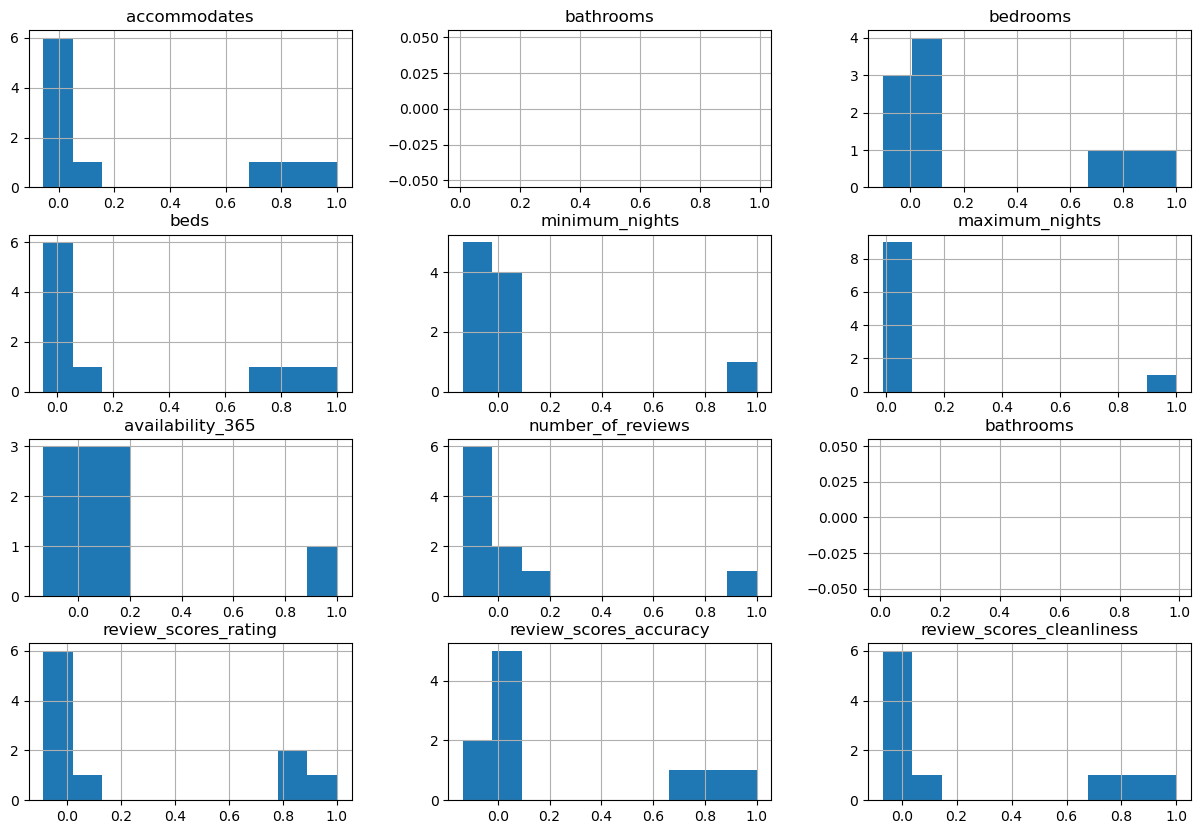

In [62]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df_corr.corr().hist(ax = ax)
plt.show()

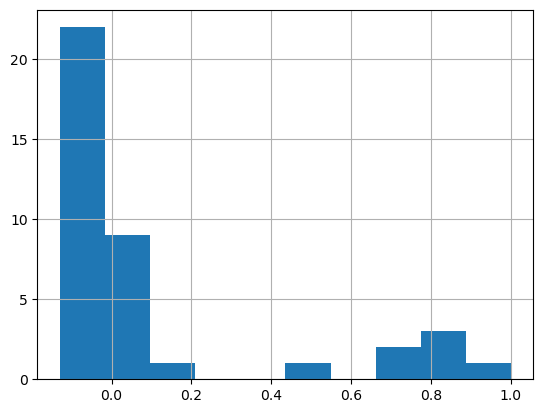

In [48]:
df3.corr()['review_scores_rating'].hist()
plt.show()

In [21]:
df3[['review_scores_cleanliness','review_scores_checkin',
     'review_scores_accuracy','review_scores_communication']].isna().sum()

review_scores_cleanliness      521
review_scores_checkin          539
review_scores_accuracy         533
review_scores_communication    527
dtype: int64

In [22]:
df4 = df3[['review_scores_cleanliness','review_scores_checkin','review_scores_rating',
           'review_scores_accuracy','review_scores_communication']].dropna()

In [23]:
Y = df4['review_scores_rating']

In [24]:
df4 = df4[['review_scores_cleanliness','review_scores_checkin','review_scores_accuracy','review_scores_communication']]

In [25]:
df4.isna().sum()

review_scores_cleanliness      0
review_scores_checkin          0
review_scores_accuracy         0
review_scores_communication    0
dtype: int64

In [26]:
train = df3.loc[df3['Year'] < 2017].copy()
test = df3.loc[df3['Year'] >= 2017].copy()

In [27]:
model = LinearRegression()

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110024 entries, 0 to 1110023
Data columns (total 70 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   id_x                                          1110024 non-null  int64  
 1   Year                                          1110024 non-null  float64
 2   name                                          1109990 non-null  object 
 3   host_url                                      1110024 non-null  object 
 4   host_name                                     1110021 non-null  object 
 5   host_since                                    1110021 non-null  object 
 6   host_location                                 965084 non-null   object 
 7   host_about                                    761077 non-null   object 
 8   host_response_time                            931199 non-null   object 
 9   host_response_rate                 

In [29]:
X = df4[['review_scores_cleanliness','review_scores_checkin','review_scores_accuracy','review_scores_communication']]

In [30]:
Y.shape

(1109485,)

In [31]:
X.shape

(1109485, 4)

In [32]:
model.fit(X, Y)

LinearRegression()

In [33]:
model.score(X,Y)

0.8458227994944221

In [34]:
results = train_test_split(X, Y, random_state=42, test_size=0.4 )
X_train, X_test, Y_train, Y_test = results
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((665691, 4), (443794, 4), (665691,), (443794,))

In [35]:
model = LinearRegression()
model.fit(X_train, Y_train)
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.8459298649740412
0.8456248732884555


In [36]:
mean_absolute_error(Y_test, model.predict(X_test))

0.053670640102365844

In [37]:
mean_squared_error(Y_test, model.predict(X_test))

0.006852090200408932

In [38]:
model.score(X_test, Y_test)

0.8456248732884555

In [39]:
predictions = model.predict(X_test)

In [40]:
r2_score(Y_test, model.predict(X_test))

0.8456248732884555

In [41]:
from matplotlib import pyplot as plt

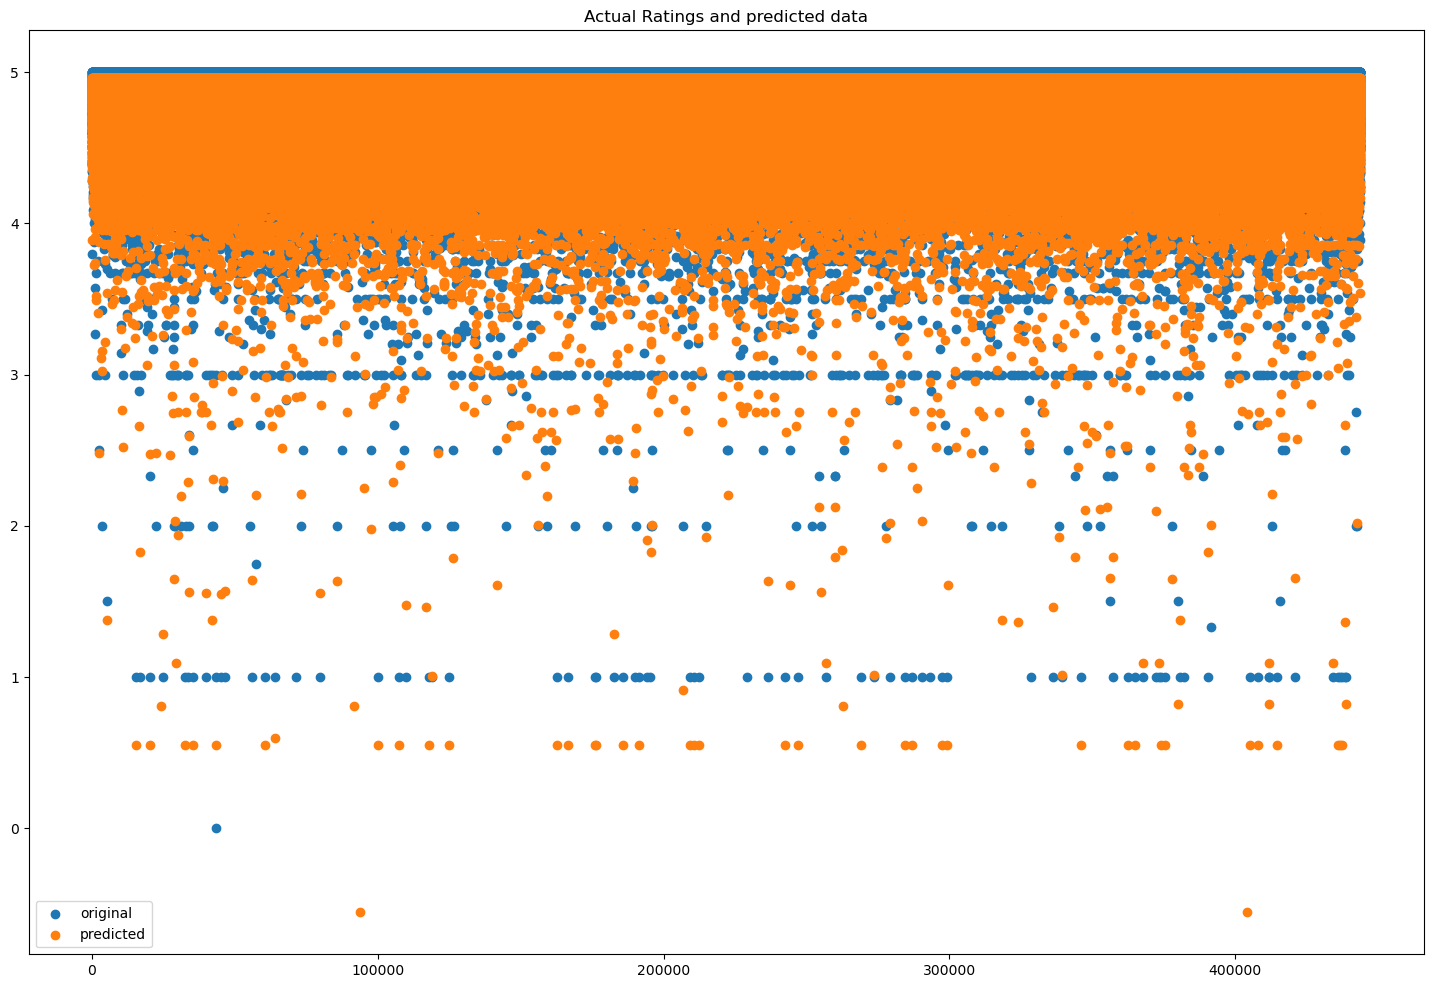

In [43]:
plt.figure(figsize=(18,12))
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, label="original")
plt.scatter(x_ax,predictions, label="predicted")
plt.title("Actual Ratings and predicted data")
plt.legend()
plt.show()

(3.2, 5.1)

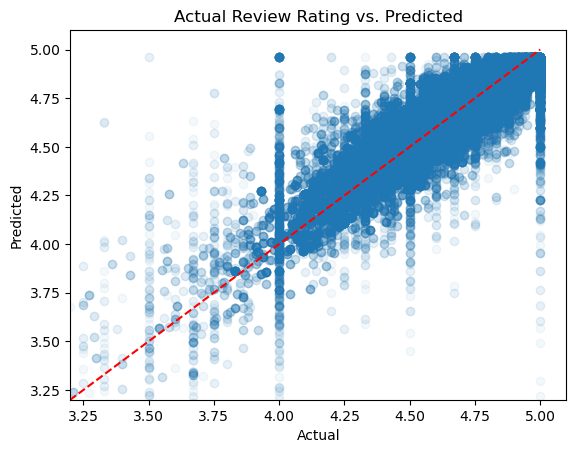

In [65]:
fig, ax = plt.subplots()
plt.scatter(Y_test, predictions,alpha = 0.05)
plt.plot([0,5],[0,5],linestyle='--', color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual Review Rating vs. Predicted')
plt.xlim(3.2,5.1)
plt.ylim(3.2,5.1)

In [45]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [46]:
# plt.figure(figsize=(12,6))
# plt.scatter(df4['review_scores_cleanliness'], Y)
# # plt.plot(df4['review_scores_cleanliness'], Y_predict, 'r')
# plt.show()